In [2]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
from utils import read_im, save_im, normalize
output_dir = pathlib.Path("image_solutions")
output_dir.mkdir(exist_ok=True)
import math

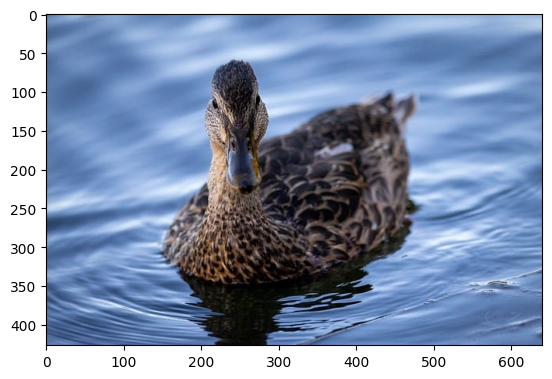

In [3]:
im = read_im(pathlib.Path("images", "duck.jpeg"))
plt.imshow(im)

In [4]:
def convolve_im(im, kernel,
                ):
    """ A function that convolves im with kernel

    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]

    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    assert len(im.shape) == 3

    # Padding
    pad = kernel.shape[0] // 2
    im = np.pad(im, pad_width=((pad, pad), (pad, pad), (0, 0)), mode='reflect')
    result = np.zeros_like(im)
    

    # Convolution
    for h in range(pad+1, len(im) - pad):
        for w in range(pad+1, len(im[h]) - pad):
            for c in range(len(im[h][w])):
                result[h][w][c] = np.sum(im[h-pad:h+pad+1, w-pad:w+pad+1, c] * kernel)
               

    result = result[pad:-pad, pad:-pad, :]
    return result

In [5]:
# Define the convolutional kernels
h_b = 1 / 256  * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Convolve images
im_smoothed = convolve_im(im.copy(), h_b)
save_im(output_dir.joinpath("im_smoothed.jpg"), im_smoothed)
im = read_im(pathlib.Path("images", "duck.jpeg"))
im_sobel = convolve_im(im, sobel_x)
save_im(output_dir.joinpath("im_sobel.jpg"), im_sobel)

# DO NOT CHANGE. Checking that your function returns as expected
assert isinstance(im_smoothed, np.ndarray),     f"Your convolve function has to return a np.array. " +    f"Was: {type(im_smoothed)}"
assert im_smoothed.shape == im.shape,     f"Expected smoothed im ({im_smoothed.shape}" +     f"to have same shape as im ({im.shape})"
# assert im_sobel.shape == im.shape,     f"Expected smoothed im ({im_sobel.shape}" +     f"to have same shape as im ({im.shape})"

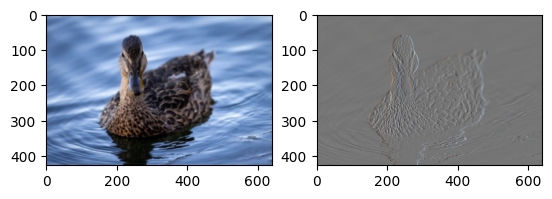

In [6]:
plt.subplot(1, 2, 1)
plt.imshow(normalize(im_smoothed))

plt.subplot(1, 2, 2)
plt.imshow(normalize(im_sobel))
plt.show()